<a href="https://colab.research.google.com/github/gerryfrank10/AI2025/blob/main/Understanding_PyTorch_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How we will learn PyTorch
1. First, we are going to cover PyTorch’s programming model, in particular, creating and manipulating tensors.
2. Then, we will see how to load data and utilize the torch.utils.data module, which will allow us to iterate through a dataset efficiently. In addition, we will discuss the existing, ready-to-use datasets in the torch.utils.data.Dataset submodule and learn how to use them.
3. After learning about these basics, the PyTorch neural network torch.nn module will be introduced.
4. Then, we will move forward to building machine learning models, learn how to compose and train the models, and learn how to save the trained models on disk for future evaluation.

# First steps with PyTorch

Now, we will take our first steps in using the low-level PyTorch API. After installing PyTorch, we will cover how to create tensors in PyTorch and different ways of manipulating them, such as changing their shape, data type, and so on.

# Installing PyTorch
To install PyTorch, we recommend consulting the latest instructions on the official https://pytorch.org
website.

Below, we will outline the basic steps that will work on most systems.
Depending on how your system is set up, you can typically just use Python’s pip installer and install PyTorch from PyPI by executing the following from your terminal:

    pip install torch torchvision

For example, I will be instally 1.9.0 version (it can be modified according to requirments)

In [1]:
!pip install torch==2.0.1 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 670.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 93.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 66.0 MB/s eta 0:00:00
INFO: pip is still looking at multip

You can also install torch as follows:

In [ ]:
!pip install torch

# Checking PyTorch Version

In [2]:
import torch
import numpy as np

print('PyTorch version:', torch.__version__)

np.set_printoptions(precision=3)

PyTorch version: 2.0.1+cu118


In [1]:
!pip install numpy

# Creating tensors in PyTorch

Now, let’s consider a few different ways of creating tensors, and then see some of their properties and how to manipulate them.

Firstly, we can simply create a tensor from a list or a NumPy array using the torch.tensor or the torch.from_numpy function as follows:


In [2]:
import numpy as np # This imports numpy
import torch

a = [1, 2, 3]
#b = np.array([4, 5, 6], dtype=np.int32) # This uses numpy to create an array
np.set_printoptions(precision=3)
t_a = torch.tensor(a)
#t_b = torch.from_numpy(b) # This converts the numpy array to a torch tensor

print(t_a)
#print(t_b)

tensor([1, 2, 3])


# Creating a tensor of random values can be done as follows:

In [3]:
rand_tensor = torch.rand(2,3)

print(rand_tensor)

tensor([[0.2543, 0.6231, 0.6794],
        [0.0721, 0.8042, 0.9889]])


# Manipulating the data type and shape of a tensor
Learning ways to manipulate tensors is necessary to make them compatible for input to a model or an operation. Now, you will learn how to manipulate tensor data types and shapes via several PyTorch functions that cast, reshape, transpose, and squeeze (remove dimensions).

# The torch.to() function can be used to change the data type of a tensor to a desired type:

In [4]:
t_a_new = t_a.to(torch.int64)

print(t_a_new.dtype)

torch.int64


# Transposing a tensor:

In [5]:
t = torch.rand(3, 5)

t_tr = torch.transpose(t, 0, 1)
print(t.shape, ' --> ', t_tr.shape)

torch.Size([3, 5])  -->  torch.Size([5, 3])


# Reshaping a tensor (for example, from a 1D vector to a 2D array):

In [6]:
t = torch.zeros(30)

t_reshape = t.reshape(5, 6)

print(t_reshape.shape)

torch.Size([5, 6])


# Removing the unnecessary dimensions (dimensions that have size 1, which are not needed):

In [7]:
t = torch.zeros(1, 2, 1, 4, 1)

t_sqz = torch.squeeze(t, 2)

print(t.shape, ' --> ', t_sqz.shape)

torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 4, 1])


# Applying mathematical operations to tensors

First, let’s instantiate two random tensors, one with uniform distribution in the range [–1, 1) and the other with a standard normal distribution:

In [8]:
torch.manual_seed(1)

t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))

Note that torch.rand returns a tensor filled with random numbers from a uniform distribution in the range of [0, 1).

Notice that t1 and t2 have the same shape. Now, to compute the element-wise product of t1 and t2, we can use the following:

In [9]:
t3 = torch.multiply(t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


# Computin mean, sum and standard deviation:

To compute the mean, sum, and standard deviation along a certain axis (or axes), we can use torch.mean(), torch.sum(), and torch.std(). For example, the mean of each column in t1 can be computed as follows:

In [10]:
t4 = torch.mean(t1, axis=0)
print(t4)

tensor([-0.1373,  0.2028])


# The matrix-matrix product between t1 and t2 can be computed by using the torch.matmul() function as follows:

In [11]:
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))

print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


# On the other hand, computing transpose of t1 and multiply with t2 is performed by transposing t1, resulting in an array of size 2×2:

In [12]:
t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)

print(t6)

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


# Split, stack, and concatenate tensors

Now, we will cover PyTorch operations for splitting a tensor into multiple tensors, or the reverse: stacking and concatenating multiple tensors into a single one.

Assume that we have a single tensor, and we want to split it into two or more tensors. For this, PyTorch provides a convenient **torch.chunk()** function, which divides an input tensor into a list of equally sized tensors. We can determine the desired number of splits as an integer using the chunks argument
to split a tensor along the desired dimension specified by the dim argument. In this case, the total size of the input tensor along the specified dimension must be divisible by the desired number of splits. Alternatively, we can provide the desired sizes in a list using the torch.split() function. Let’s have a look at an example of both these options:

# Providing the number of splits:

In [13]:
torch.manual_seed(1)

t = torch.rand(6)

print(t)
#import torch
t_splits = torch.chunk(t, 3)

[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

In this example, a tensor of size 6 was divided into a list of three tensors each with size 2. If the tensor size is not divisible by the chunks value, the last chunk will be smaller.

In [14]:
torch.manual_seed(1)

t = torch.rand(8)

print(t)
#import torch
t_splits = torch.chunk(t, 3)

[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999, 0.3971, 0.7544])


[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029, 0.8  ], dtype=float32),
 array([0.397, 0.754], dtype=float32)]

# Providing the sizes of different splits:
Alternatively, instead of defining the number of splits, we can also specify the sizes of the
output tensors directly. Here, we are splitting a tensor of size 5 into tensors of sizes 3 and 2:

In [16]:
torch.manual_seed(1)
t = torch.rand(5)

print(t)

t_splits = torch.split(t, split_size_or_sections=[3, 2])

[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

# Stacking Tensors

Sometimes, we are working with multiple tensors and need to concatenate or stack them to create a single tensor. In this case, PyTorch functions such as torch.stack() and torch.cat() come in handy.

For example, let’s create a 1D tensor, A, containing 1s with size 3, and a 1D tensor, B, containing 0s with size 2, and concatenate them into a 1D tensor, C, of size 5:

In [15]:
A = torch.ones(3)
B = torch.zeros(2)

C = torch.cat([A, B], axis=0)
print(C)

tensor([1., 1., 1., 0., 0.])


If we create 1D tensors A and B, both with size 3, then we can stack them together to form a 2D tensor, S:

In [17]:
A = torch.ones(3)
B = torch.zeros(3)

S = torch.stack([A, B], axis=1)
print(S)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


The PyTorch API has many operations that you can use for building a model, processing your data, and more. However, covering every function is not possible, where we will focus on the most essential ones. For the full list of operations and functions, you can refer to the documentation
page of PyTorch at https://pytorch.org/docs/stable/index.html.

# Building input pipelines in PyTorch

# Creating a PyTorch DataLoader from existing tensors
If the data already exists in the form of a tensor object, a Python list, or a NumPy array, we can easily create a dataset loader using the torch.utils.data.DataLoader() class. It returns an object of the DataLoader class, which we can use to iterate through the individual elements in the input dataset. As
a simple example, consider the following code, which creates a dataset from a list of values from 0 to 5:

In [18]:
from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

We can easily iterate through a dataset entry by entry as follows:

In [19]:
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


If we want to create batches from this dataset, with a desired batch size of 3, we can do this with the batch_size argument as follows:

In [22]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


This will create two batches from this dataset, where the first three elements go into batch #1, and the remaining elements go into batch #2. The optional drop_last argument is useful for cases when the number of elements in the tensor is not divisible by the desired batch size. We can drop the last
non-full batch by setting drop_last to True. The default value for drop_last is False.

We can always iterate through a dataset directly, but as you just saw, DataLoader provides an automatic and customizable batching to a dataset.

# Combining two tensors into a joint dataset

Often, we may have the data in two (or possibly more) tensors. For example, we could have a tensor for features and a tensor for labels. In such cases, we need to build a dataset that combines these tensors, which will allow us to retrieve the elements of these tensors in tuples.

Assume that we have two tensors, t_x and t_y. Tensor t_x holds our feature values, each of size 3, and t_y stores the class labels. For this example, we first create these two tensors as follows:

In [23]:
torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype=torch.float32)
#print(t_x)
t_y=torch.arange(4)
#print(t_y)

Now, we want to create a joint dataset from these two tensors. We first need to create a Dataset class as follows:

In [24]:
from torch.utils.data import Dataset

class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

A custom Dataset class must contain the following methods to be used by the data loader later on:

• __init__(): This is where the initial logic happens, such as reading existing arrays, loading a file, filtering data, and so forth.

• __getitem__(): This returns the corresponding sample to the given index.

Then we create a joint dataset of t_x and t_y with the custom Dataset class as follows:

In [28]:
torch.manual_seed(1)

t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)
joint_dataset = JointDataset(t_x, t_y)

# Or use TensorDataset directly
# from torch.utils.data import TensorDataset
# joint_dataset = TensorDataset(t_x, t_y)

for example in joint_dataset:
    print('  x: ', example[0],
          '  y: ', example[1])

  x:  tensor([0.7576, 0.2793, 0.4031])   y:  tensor(0)
  x:  tensor([0.7347, 0.0293, 0.7999])   y:  tensor(1)
  x:  tensor([0.3971, 0.7544, 0.5695])   y:  tensor(2)
  x:  tensor([0.4388, 0.6387, 0.5247])   y:  tensor(3)


# Shuffle, batch, and repeat

As discussed, training Machine Learning Algorithms for Classification, when
training an NN model using stochastic gradient descent optimization, it is important to feed training data as randomly shuffled batches.

You have already seen how to specify the batch size using the batch_size argument of a data loader object. Now, in addition to creating batches, you will see how to shuffle and reiterate over the datasets. We will continue working with the previous joint dataset.

First, let’s create a shuffled version data loader from the joint_dataset dataset:

In [30]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

Here, each batch contains two data records (x) and the corresponding labels (y). Now we iterate through the data loader entry by entry as follows:

In [31]:
for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0],
              '\n         y:', batch[1])

batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
         y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])


The rows are shuffled without losing the one-to-one correspondence between the entries in x and y.

In addition, when training a model for multiple epochs, we need to shuffle and iterate over the dataset by the desired number of epochs. So, let’s iterate over the batched dataset twice:

In [32]:
for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0],
              '\n         y:', batch[1])

epoch 1
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([0, 2])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])
epoch 2
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
         y: tensor([0, 1])


This results in two different sets of batches. In the first epoch, the first batch contains a pair of values [y=1, y=2], and the second batch contains a pair of values [y=3, y=0]. In the second epoch, two batches contain a pair of values, [y=2, y=0] and [y=1, y=3] respectively. For each iteration, the elements within a batch are also shuffled

# Creating a dataset from files on your local storage disk

Now, we will build a dataset from image files stored on disk. There is an image folder associated with the online content of this chapter. After downloading the folder, you should be able to see six images of cats and dogs in JPEG format.This small dataset will show how building a dataset from stored files generally works.

To accomplish this, we are going to use two additional modules: Image in PIL to read the image file contents and transforms in torchvision to decode the raw contents and resize the images.

Before we start, let’s take a look at the content of these files. We will use the pathlib library to generate a list of image files:

In [35]:
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

['cat_dog_images/cat1.jpg', 'cat_dog_images/cat2.jpg', 'cat_dog_images/cat3.jpg', 'cat_dog_images/dog1.jpg', 'cat_dog_images/dog2.jpg', 'cat_dog_images/dog3.jpg']


Next, we will visualize these image examples using Matplotlib:

Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


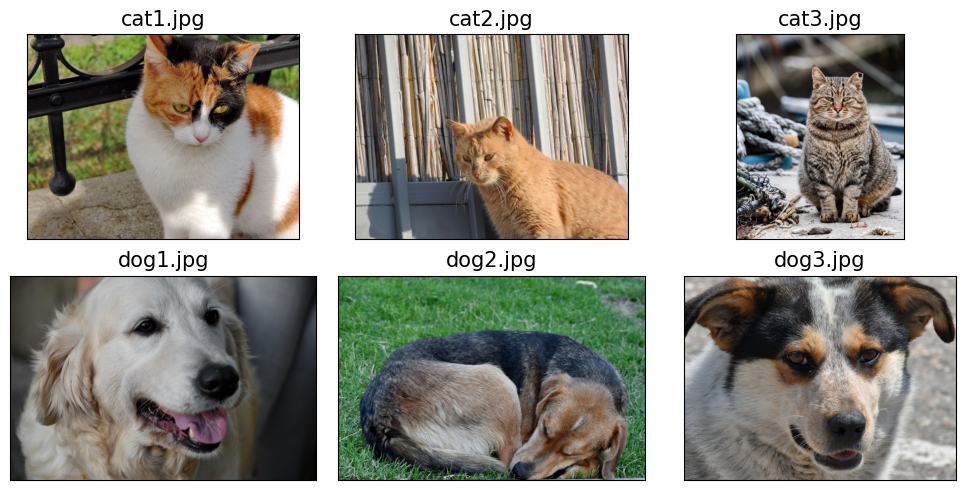

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image


fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape: ', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)

#plt.savefig('figures/12_03.pdf')
plt.tight_layout()
plt.show()

Just from this visualization and the printed image shapes, we can already see that the images have different aspect ratios. If you print the aspect ratios (or data array shapes) of these images, you will see that some images are 900 pixels high and 1200 pixels wide (900×1200), some are 800×1200, and one is
900×742. Later, we will preprocess these images to a consistent size.

Another point to consider is that the labels for these images are provided within their filenames. So, we extract these labels from the list of filenames, assigning label 1 to dogs and label 0 to cats:

In [38]:
labels = [1 if 'dog' in os.path.basename(file) else 0
          for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


Now, we have two lists: a list of filenames (or paths of each image) and a list of their labels.

In the previous section, you learned how to create a joint dataset from two arrays. Here, we will do the following

In [40]:
from torch.utils.data import Dataset  # Importing the Dataset class
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file, label

    def __len__(self):
        return len(self.labels)

image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

cat_dog_images/cat1.jpg 0
cat_dog_images/cat2.jpg 0
cat_dog_images/cat3.jpg 0
cat_dog_images/dog1.jpg 1
cat_dog_images/dog2.jpg 1
cat_dog_images/dog3.jpg 1


The joint dataset has filenames and labels.

Next, we need to apply transformations to this dataset: load the image content from its file path, decode the raw content, and resize it to a desired size, for example, 80×120. As mentioned before, we use the

    torchvision.transforms

module to resize the images and convert the loaded pixels into tensors as follows:

    import torchvision.transforms as transforms
    img_height, img_width = 80, 120
    
    transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
    ])


In [41]:
import torchvision.transforms as transforms

class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    def __len__(self):
        return len(self.labels)

img_height, img_width = 80, 120

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
])

image_dataset = ImageDataset(file_list, labels, transform)

Finally, we visualize these transformed image examples using Matplotlib:

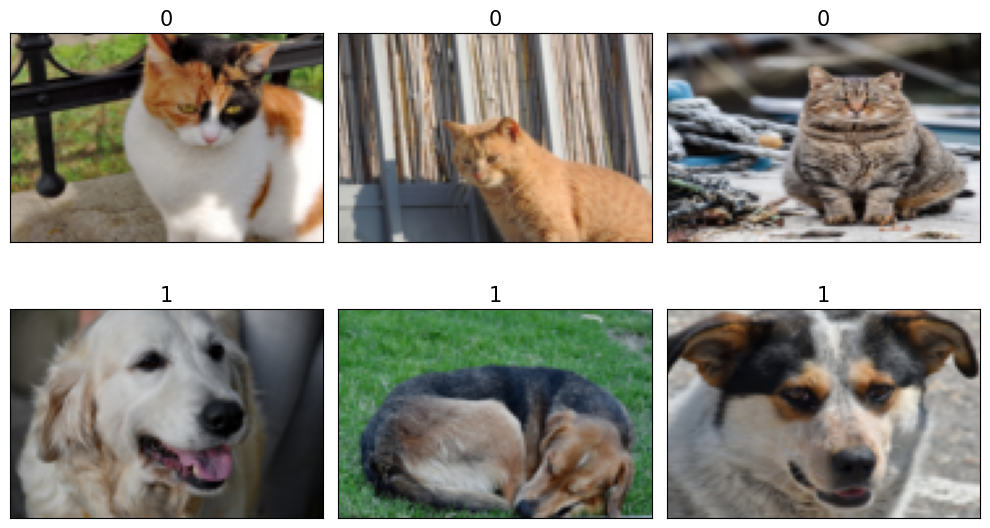

In [42]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)

plt.tight_layout()
#plt.savefig('figures/12_04.pdf')
plt.show()

The __getitem__ method in the ImageDataset class wraps all four steps into a single function, including
the loading of the raw content (images and labels), decoding the images into tensors, and resizing the
images. The function then returns a dataset that we can iterate over and apply other operations that
we learned about in the previous sections via a data loader, such as shuffling and batching

# Fetching available datasets from the torchvision.datasets library

The

    torchvision.datasets

library provides a nice collection of freely available image datasets for
training or evaluating deep learning models. Similarly, the

    torchtext.datasets

library provides datasets for natural language. Here, we use

    torchvision.datasets

as an example.

The torchvision datasets (https://pytorch.org/vision/stable/datasets.html) are nicely formatted and come with informative descriptions, including the format of features and labels and their type and dimensionality, as well as the link to the original source of the dataset.

Another advantage is that these datasets are all subclasses of

    torch.utils.data.Dataset

So all the functions we covered in the previous sections can be used directly.

So, let’s see how to use these datasets in action.

First, if you haven’t already installed torchvision together with PyTorch earlier, you need to install the torchvision library via pip from the command line:

In [ ]:
pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

You can take a look at the list of available datasets at https://pytorch.org/vision/stable/datasets.html

# In the following paragraphs, we will cover fetching two different datasets: CelebA (celeb_a) and the MNIST digit dataset.



In [43]:
import torchvision

You can take a look at the list of available datasets at https://pytorch.org/vision/stable/datasets.
html.

In the following paragraphs, we will cover fetching two different datasets: CelebA (celeb_a) and the
MNIST digit dataset.

Let’s first work with the CelebA dataset (http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) with
torchvision.datasets.CelebA (https://pytorch.org/vision/stable/datasets.html#celeba). The
description of torchvision.datasets.CelebA provides some useful information to help us understand
the structure of this dataset:

• The database has three subsets, 'train', 'valid', and 'test'. We can select a specific subset
or load all of them with the split parameter.

• The images are stored in PIL.Image format. And we can obtain a transformed version using a
custom transform function, such as transforms.ToTensor and transforms.Resize.

• There are different types of targets we can use, including 'attributes', 'identity', and
'landmarks'. 'attributes' is 40 facial attributes for the person in the image, such as facial
expression, makeup, hair properties, and so on; 'identity' is the person ID for an image;
and 'landmarks' refers to the dictionary of extracted facial points, such as the position of the
eyes, nose, and so on.


Next, we will call the

    torchvision.datasets.CelebA

class to download the data, store it on disk in a
designated folder, and load it into a torch.utils.data.Dataset object:

In [45]:
image_path = './'
celeba_dataset = torchvision.datasets.CelebA(
    image_path, split='train', target_type='attr', download=True)

FileURLRetrievalError: Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM

but Gdown can't. Please check connections and permissions.

You may run into a BadZipFile: File is not a zip file error, or RuntimeError: The daily quota
of the file img_align_celeba.zip is exceeded and it can't be downloaded. This is a
limitation of Google Drive and can only be overcome by trying again later; it just means
that Google Drive has a daily maximum quota that is exceeded by the CelebA files.

To work around it, you can manually download the files from the source: http://mmlab.ie.cuhk.edu.hk/projects/
CelebA.html. In the downloaded folder, celeba/, you can unzip the img_align_celeba.zip file. The
image_path is the root of the downloaded folder, celeba/. If you have already downloaded the files
once, you can simply set download=False.

Now that we have instantiated the datasets, let’s check if the object is of the torch.utils.data.Dataset
class:

In [47]:
assert isinstance(celeba_dataset, torch.utils.data.Dataset)

NameError: name 'celeba_dataset' is not defined

As mentioned, the dataset is already split into train, test, and validation datasets, and we only load the
train set. And we only use the 'attributes' target. In order to see what the data examples look like,
we can execute the following code:

In [46]:
example = next(iter(celeba_dataset))
print(example)

NameError: name 'celeba_dataset' is not defined

Note that the sample in this dataset comes in a tuple of (PIL.Image, attributes). If we want to pass
this dataset to a supervised deep learning model during training, we have to reformat it as a tuple of
(features tensor, label). For the label, we will use the 'Smiling' category from the attributes as
an example, which is the 31st element.

Finally, let’s take the first 18 examples from it to visualize them with their 'Smiling' labels:

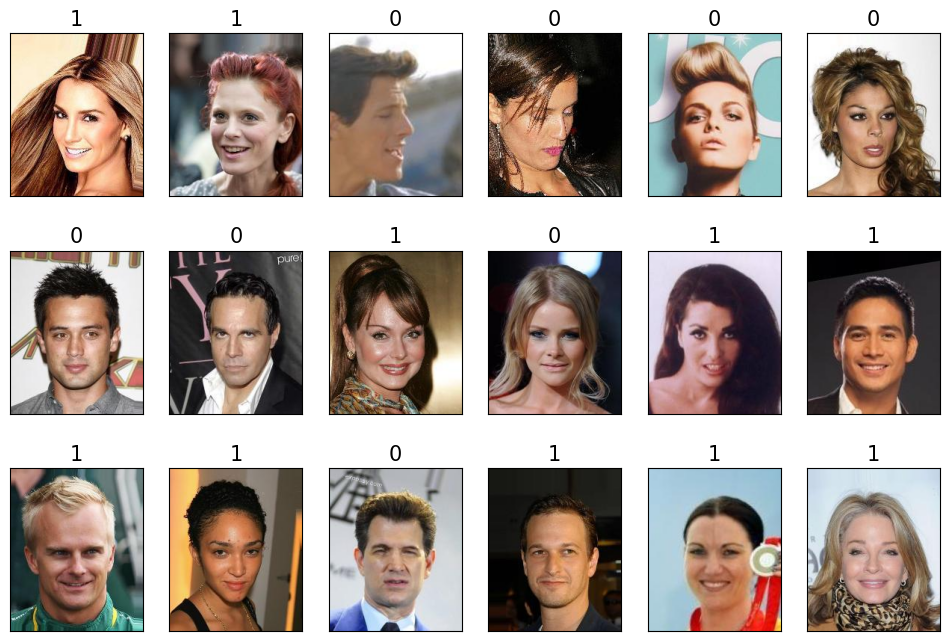

In [ ]:
from itertools import islice
fig = plt.figure(figsize=(12, 8))
for i, (image, attributes) in islice(enumerate(celeba_dataset), 18):
    ax = fig.add_subplot(3, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image)
    ax.set_title(f'{attributes[31]}', size=15)

#plt.savefig('figures/12_05.pdf')
plt.show()

# MNIST Database Using PyTorch:

Next, we will proceed with the second dataset from torchvision.datasets.MNIST (https://pytorch.
org/vision/stable/datasets.html#mnist).

Let’s see how it can be used to fetch the MNIST digit dataset:

• The database has two partitions, 'train' and 'test'. We need to select a specific subset to load.

• The images are stored in PIL.Image format. And we can obtain a transformed version using a
custom transform function, such as transforms.ToTensor and transforms.Resize.

• There are 10 classes for the target, from 0 to 9.

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 478kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.43MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.46MB/s]


(<PIL.Image.Image image mode=L size=28x28 at 0x7B797B31CFD0>, 5)


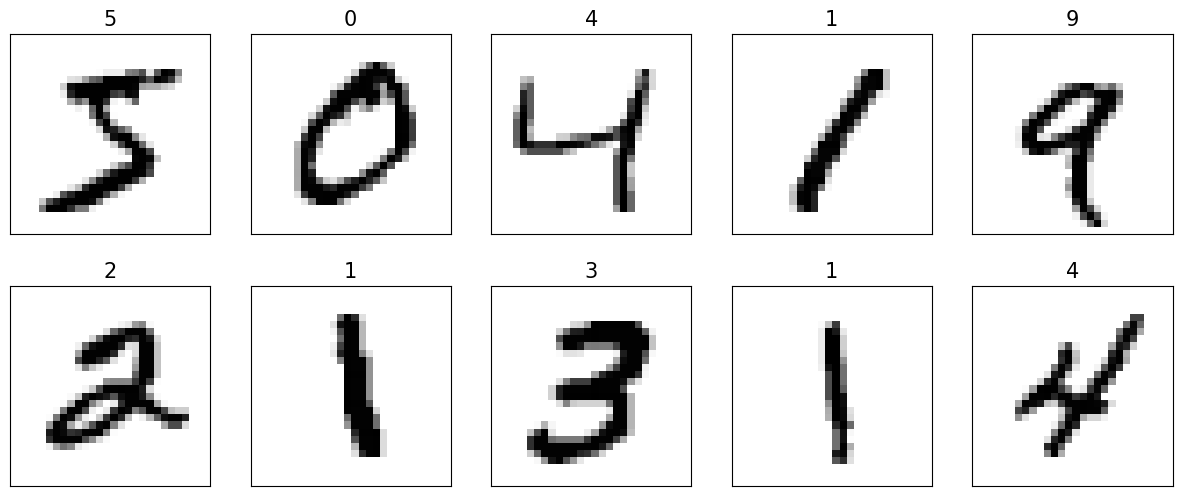

In [48]:
from itertools import islice # Import islice from itertools
mnist_dataset = torchvision.datasets.MNIST(image_path, 'train', download=True)

assert isinstance(mnist_dataset, torch.utils.data.Dataset)

example = next(iter(mnist_dataset))
print(example)

fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)

plt.show()

# Summary:

This concludes our coverage of building and manipulating datasets and fetching datasets from the

    torchvision.datasets

library.
